In [586]:
___Author___='LumberJack Jyss'

In [587]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [588]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [589]:
import warnings
warnings.filterwarnings("ignore")

In [590]:
start = '2017-02-16'
end = '2019-05-28'

In [591]:
vix = pd.read_csv('vix_5Y.csv')
index_pc = pd.read_csv('indexpc 2014_2019.csv',delimiter=';')
header = index_pc.iloc[1]
index_pc = index_pc.iloc[2:,:]
index_pc = index_pc.rename(columns = header)
index_pc.reset_index(inplace=True,drop=True)
vix = vix.iloc[:-1,1:-1]

In [592]:
index_pc.tail()

DATE    CALL      PUT    TOTAL P/C Ratio
1251  05/21/2019  793567  1156224  1949791      1.46
1252  05/22/2019  838707   862131  1700838      1.03
1253  05/23/2019  825548  1199985  2025533      1.45
1254  05/24/2019  809790   804403  1614193      0.99
1255  05/28/2019  661477   878284  1539761      1.33

In [593]:
df = pd.read_csv('spx_5Y.csv')
df = df.iloc[1:,1:-1]

In [594]:
vix.shape,df.shape,index_pc.shape

((1256, 5), (1256, 5), (1256, 5))

In [595]:
df.head()

Date     Open     High      Low    Close
1  20140609  1948.97  1955.55  1947.16  1951.27
2  20140610  1950.34  1950.79  1944.64  1950.79
3  20140611  1949.37  1949.37  1940.08  1943.89
4  20140612  1943.35  1943.35  1925.78  1930.11
5  20140613  1930.80  1937.30  1927.69  1936.16

In [596]:
vix.head()

Date   Open   High    Low  Close
0  20140602  11.69  12.17  11.29  11.58
1  20140603  12.03  12.13  11.72  11.87
2  20140604  12.15  12.33  11.91  12.08
3  20140605  12.09  12.34  11.44  11.68
4  20140606  11.32  11.39  10.73  10.73

for i in range(0,vix.shape[0]-1):
    if vix.iloc[i,0]!= df.iloc[i,0]:
        print('Vix :', vix.iloc[i,0],' spy : ', df.iloc[i,0])
        print('Index Vix:', vix.index[i],' index GBP/USD :',df.index[i])
        #df = df.drop([i],axis=0)
vix.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True,drop=True)

In [597]:
vix.shape,df.shape

((1256, 5), (1256, 5))

In [598]:
vix.tail()

Date   Open   High    Low  Close
1251  20190521  15.86  16.22  14.79  14.95
1252  20190522  15.06  15.44  14.42  14.75
1253  20190523  15.93  18.05  15.28  16.92
1254  20190524  16.34  16.52  15.52  15.85
1255  20190528  16.55  17.70  15.90  17.50

In [599]:
df.tail()

Date     Open     High      Low    Close
1252  20190529  2790.25  2792.03  2766.06  2783.02
1253  20190530  2786.94  2799.00  2776.74  2788.86
1254  20190531  2766.15  2768.98  2750.52  2752.06
1255  20190603  2751.53  2763.07  2728.81  2744.45
1256  20190604  2762.64  2804.49  2762.63  2803.40

In [600]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1256
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1005  jours 
Bloc 2 : 251  jours


In [601]:
dataset_1D = df.copy()
dataset_1D['Vix'] = vix['Close']
dataset_1D['P/C Ratio'] = index_pc['P/C Ratio']
dataset_1D.head()

Date     Open     High      Low    Close    Vix P/C Ratio
1  20140609  1948.97  1955.55  1947.16  1951.27  11.87      1.38
2  20140610  1950.34  1950.79  1944.64  1950.79  12.08      0.74
3  20140611  1949.37  1949.37  1940.08  1943.89  11.68      0.73
4  20140612  1943.35  1943.35  1925.78  1930.11  10.73      1.04
5  20140613  1930.80  1937.30  1927.69  1936.16  11.15      0.97

In [602]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN

In [603]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

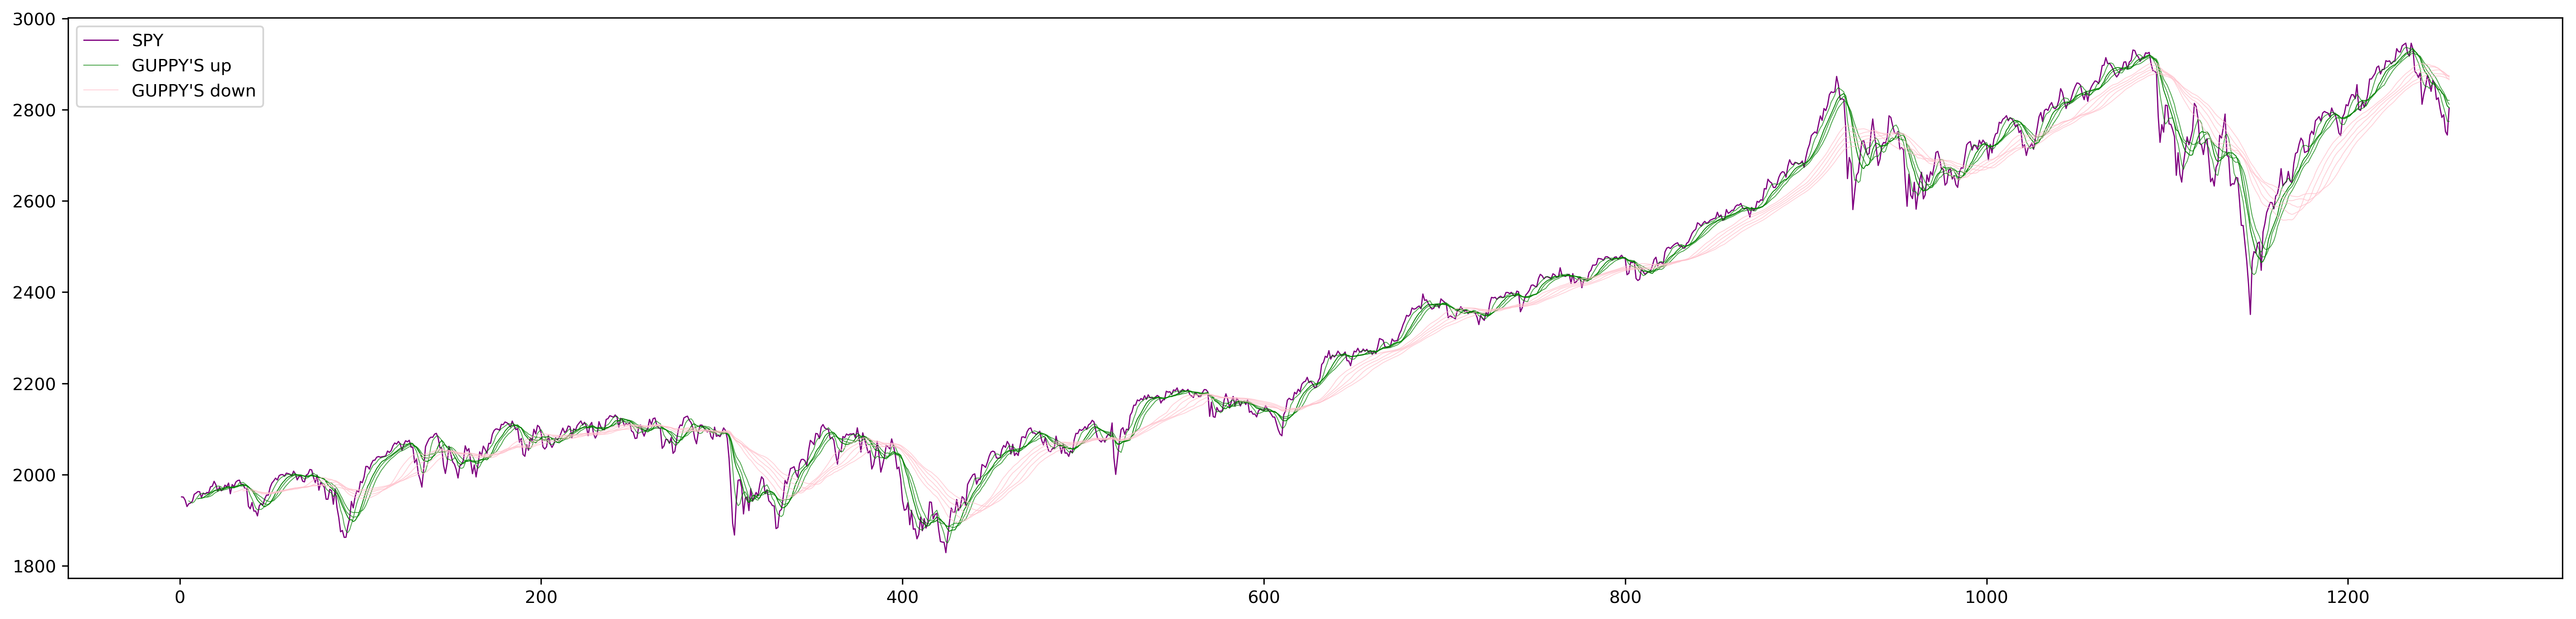

In [604]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [605]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,))

X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.01, -0.01)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
plt.figure(figsize=(26,6),dpi=200)
X.plot()
ts_pivots.plot(style='g-o',lw=0.8,alpha=0.8);

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)

  

In [606]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.03, -0.03)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots_up = ts_pivots[pivots == -1]
ts_pivots_down = ts_pivots[pivots == 1]
ts_pivots_all = ts_pivots[pivots!=0]

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(abs(pivots[i]))
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(abs(pivots[i]))
    else:
        peak.append(0)
        valley.append(0)
        

In [607]:
len(pivots)

1256

In [608]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [609]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape

((1256,), (1256,), (1256,), (1256,))

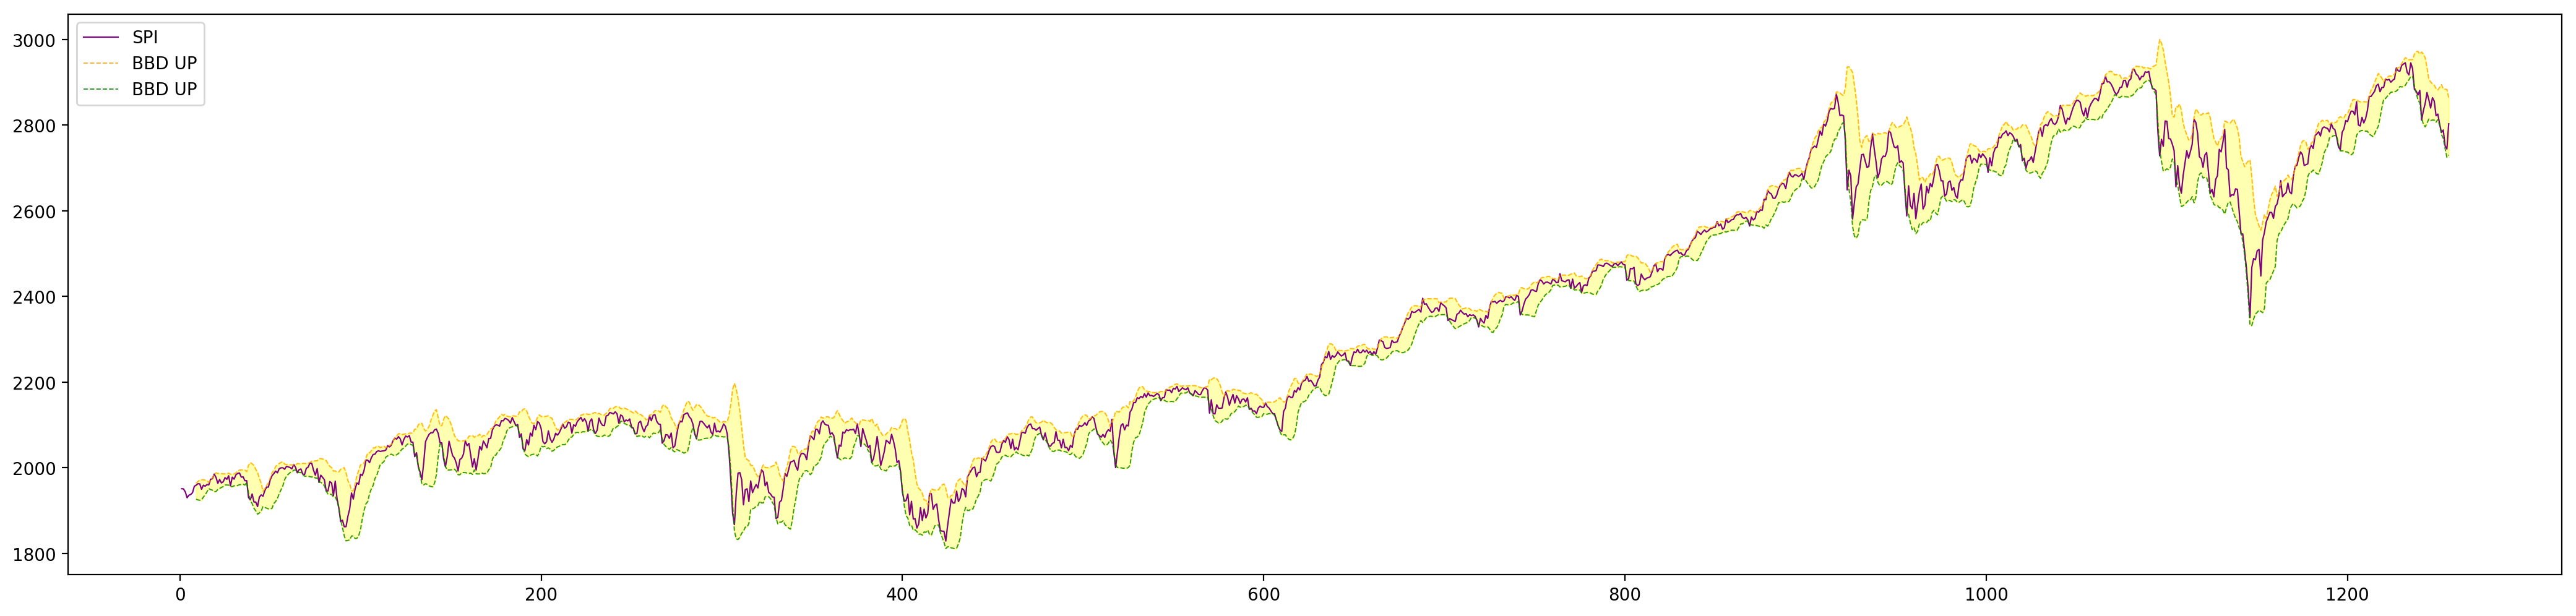

In [610]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [611]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi75_list.append(75 - rsi[i])
        rsi25_list.append(rsi[i] - 25)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

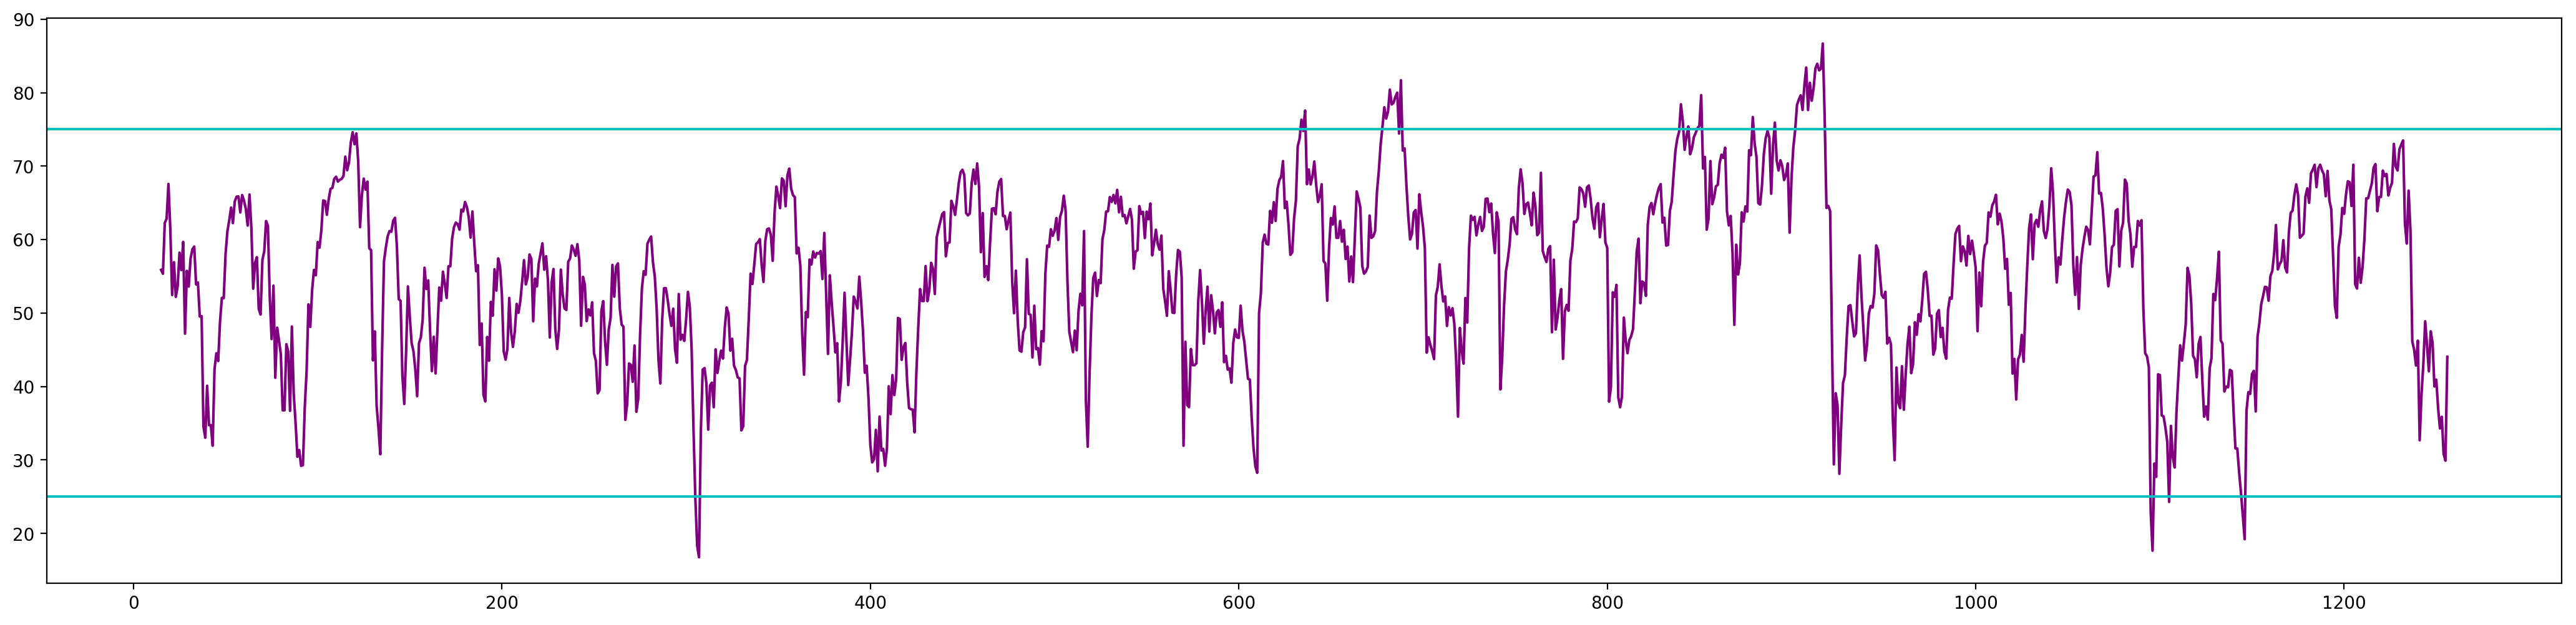

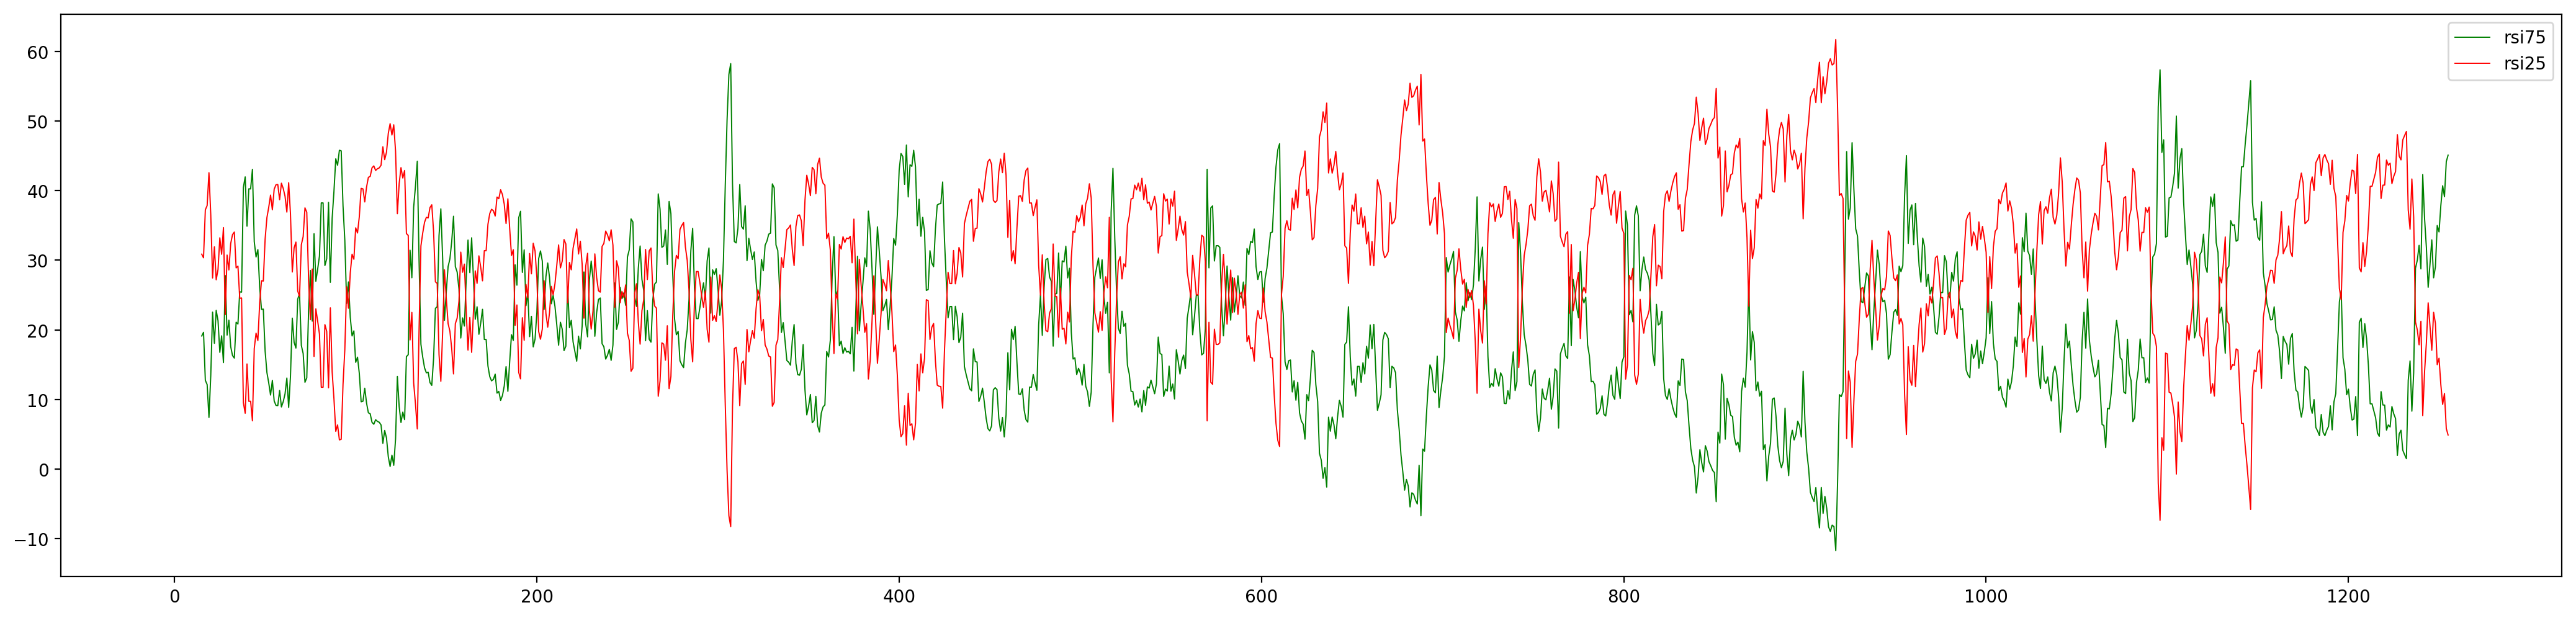

In [612]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [613]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']
varop_vix = vix['Open'] - vix['Close']
varhl_vix = vix['High'] - vix['Low']

In [614]:
varop_spy.shape,varhl_spy.shape,varop_vix.shape,varhl_vix.shape

((1256,), (1256,), (1256,), (1256,))

In [615]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['Varop_vix'] = varop_vix
dataset_1D['Varhl_vix'] = varhl_vix
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

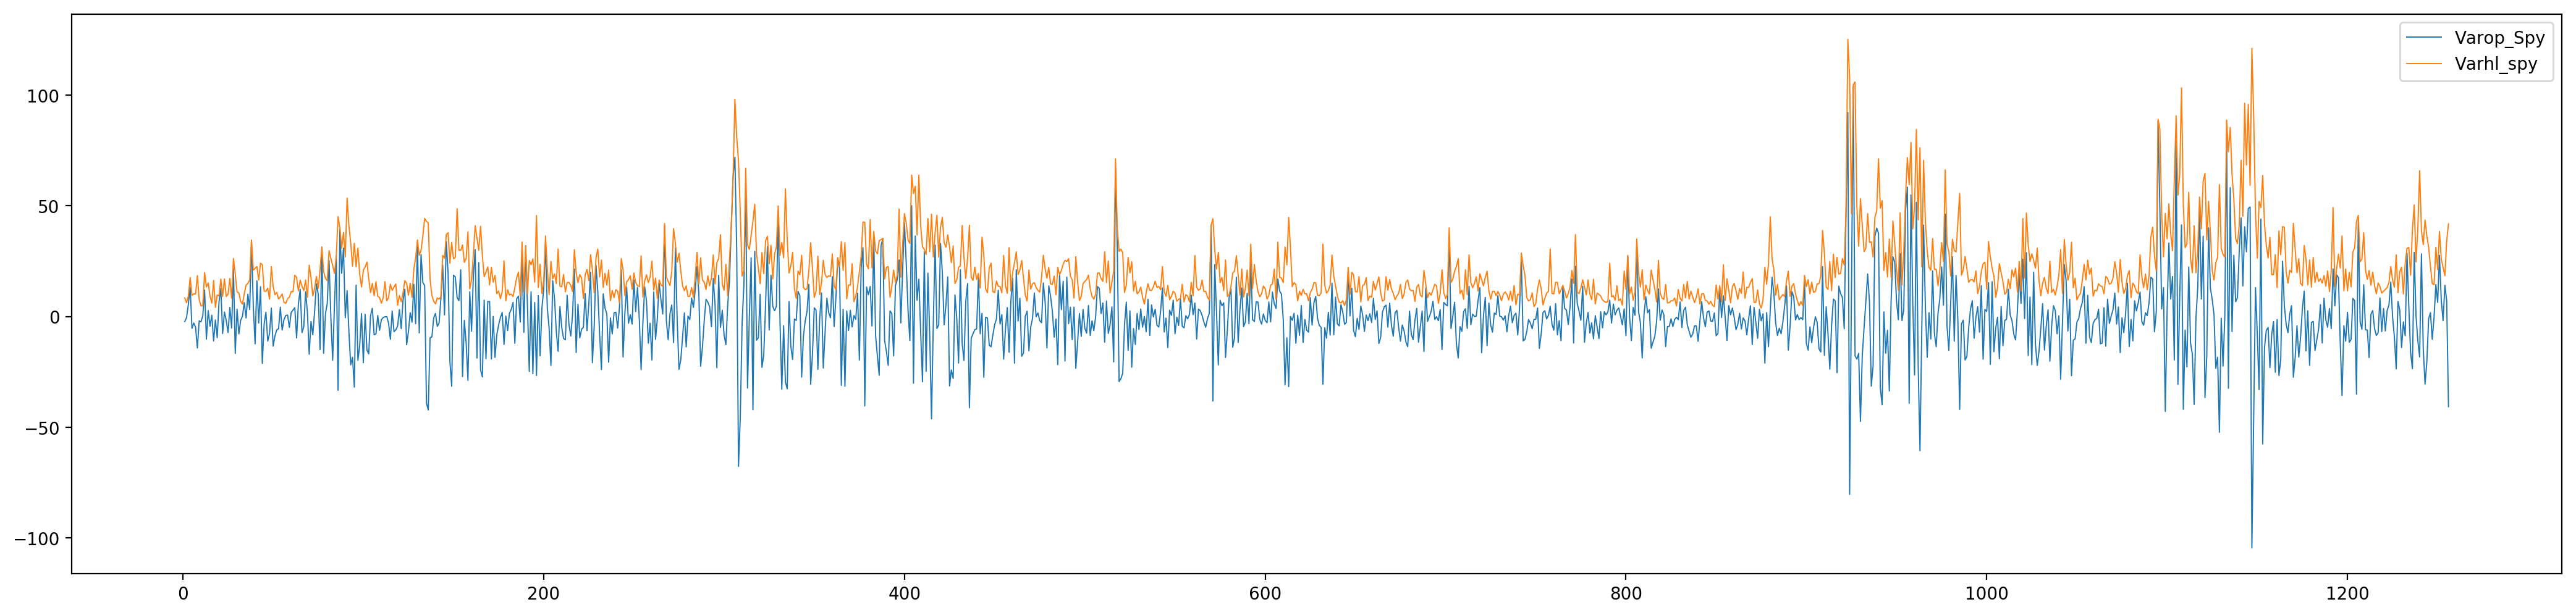

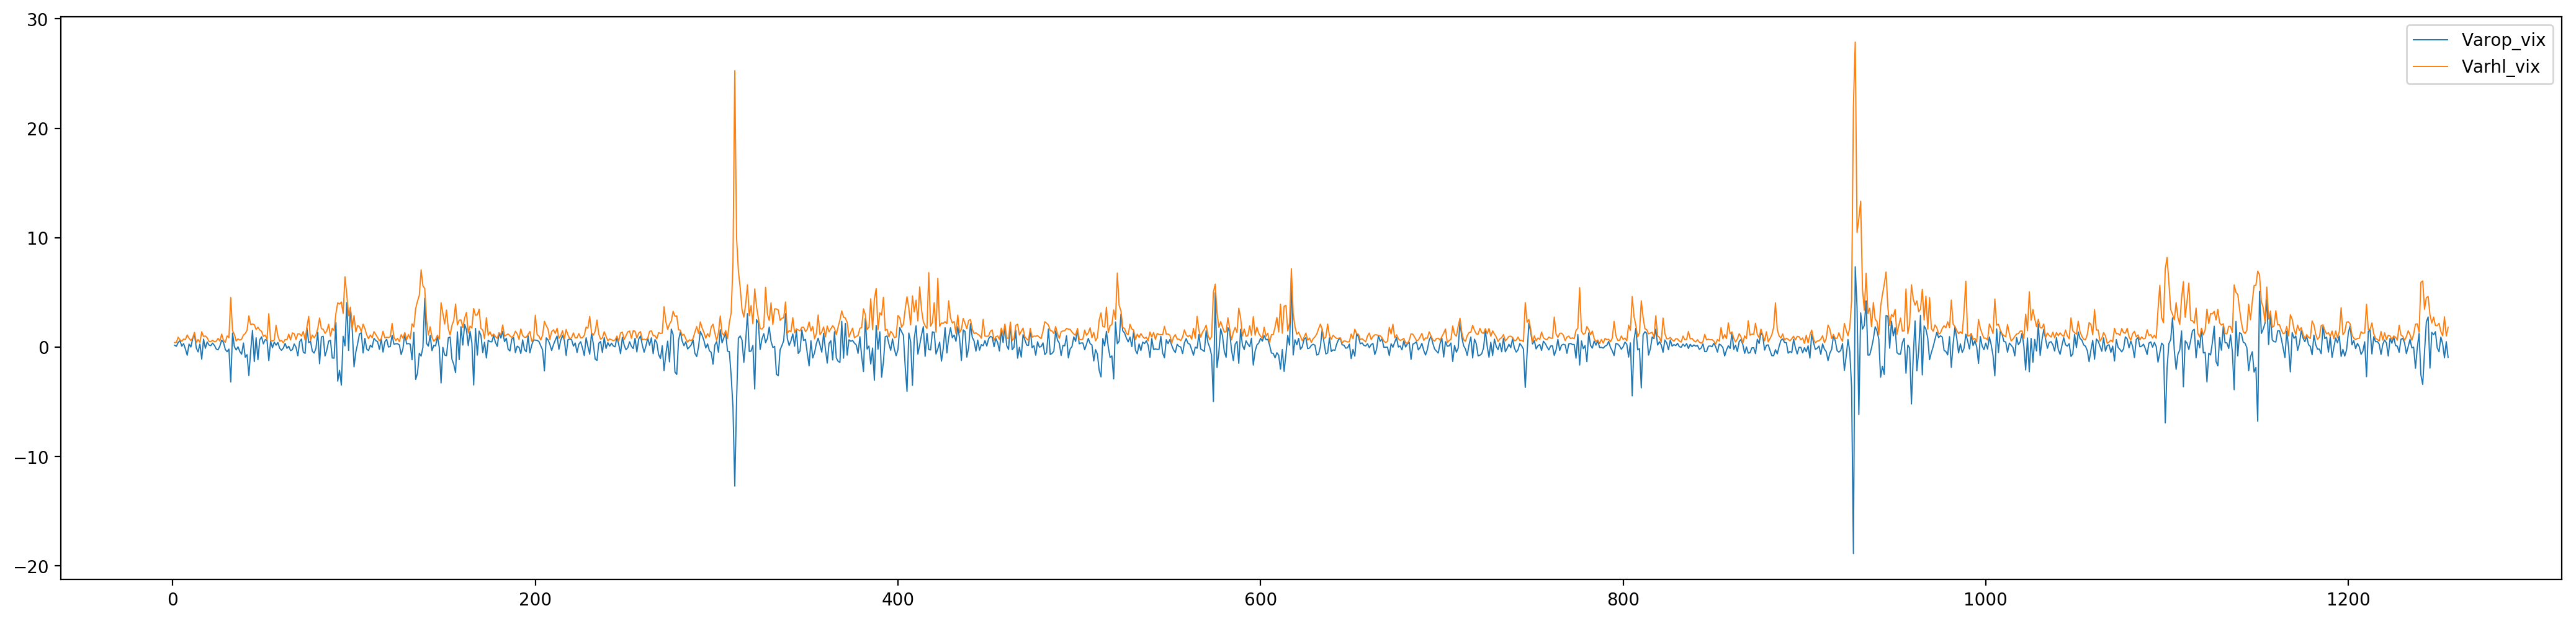

In [616]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_vix'],label = 'Varop_vix',lw=0.7)
plt.plot(dataset_1D['Varhl_vix'],label = 'Varhl_vix',lw=0.7)
plt.legend()
plt.show()

In [617]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix        RSI   75 - RSI  \
1252       7.23      25.97       0.31       1.02  34.298736  37.883125   
1253      -1.92      22.26      -0.99       2.77  35.879460  40.701264   
1254      14.09      18.46       0.49       1.00  30.843665  39.120540   
1255       7.08      34.26      -0.95       1.80  29.908813  44.156335   
1256     -40.76      41.86        NaN        NaN  44.054547  45.091187   

       RSI - 25  
1252  12.116875  
1253   9.298736  
1254  10.879460  
1255   5.843665  
1256   4.908813

In [618]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix        RSI   75 - RSI  \
1252       7.23      25.97       0.31       1.02  34.298736  37.883125   
1253      -1.92      22.26      -0.99       2.77  35.879460  40.701264   
1254      14.09      18.46       0.49       1.00  30.843665  39.120540   
1255       7.08      34.26      -0.95       1.80  29.908813  44.156335   
1256     -40.76      41.86        NaN        NaN  44.054547  45.091187   

       RSI - 25  BBD_Delta_Up  
1252  12.116875     58.242759  
1253   9.298736     57.749764  
1254  10.879460     69.209394  
1255   5.843665     79.188194  
1256   4.908813     67.011172

In [619]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [620]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  ...  BBD_Delta_Up  delta5_8  delta8_10  \
1252       7.23      25.97       0.31  ...     58.242759 -13.76650   -6.37550   
1253      -1.92      22.26      -0.99  ...     57.749764 -18.41475   -8.99925   
1254      14.09      18.46       0.49  ...     69.209394 -21.42950   -7.59450   
1255       7.08      34.26      -0.95  ...     79.188194 -22.76275  -11.07525   
1256     -40.76      41.86        NaN  ...     67.011172 -15.95200  -14.00100   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1252    2.499667   -8.308333  -39.352000   -1.463619    0.381786    6.245389   
1253   -1.792833   -4.188500  -41.449333   -2.851048   -0.211286    4.943667   
1254   -7.356333   -3.140333  -44.413667   -3.907381   -1.067786    3.094833   
1255   -9.988500   -2.886167  -48.191000   -5.149476   -1.804857    1.298889   
1256   -7.594833   -8.398167  -45.270000   -5.663429   -2.543071   -0.245722   

      delta45_50  
1252    5.598511  
1253    5.814933  
1254    6.073667  
1255    6.704711  
1256    5.962022  

[5 rows x 24 columns]

In [621]:
spread = dataset_1D['Close'] - dataset_1D['Vix']
dataset_1D['Spread'] = spread
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta5_8  delta8_10  delta10_12  \
1252       7.23      25.97       0.31  ... -13.76650   -6.37550    2.499667   
1253      -1.92      22.26      -0.99  ... -18.41475   -8.99925   -1.792833   
1254      14.09      18.46       0.49  ... -21.42950   -7.59450   -7.356333   
1255       7.08      34.26      -0.95  ... -22.76275  -11.07525   -9.988500   
1256     -40.76      41.86        NaN  ... -15.95200  -14.00100   -7.594833   

      delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  \
1252   -8.308333  -39.352000   -1.463619    0.381786    6.245389    5.598511   
1253   -4.188500  -41.449333   -2.851048   -0.211286    4.943667    5.814933   
1254   -3.140333  -44.413667   -3.907381   -1.067786    3.094833    6.073667   
1255   -2.886167  -48.191000   -5.149476   -1.804857    1.298889    6.704711   
1256   -8.398167  -45.270000   -5.663429   -2.543071   -0.245722    5.962022   

       Spread  
1252  2768.27  
1253  2771.94  
1254  2736.21  
1255  2726.95  
1256      NaN  

[5 rows x 25 columns]

In [622]:
len(peak),len(valley),len(ts_pivots)

(1256, 1256, 1256)

In [623]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    355.000000
        1    900.000000
mean   -1     -0.004429
        1      0.002199
std    -1      0.010248
        1      0.006736
min    -1     -0.040979
        1     -0.024757
25%    -1     -0.009285
        1     -0.001352
50%    -1     -0.002824
        1      0.001261
75%    -1      0.001275
        1      0.005211
max    -1      0.027157
        1      0.049594
dtype: float64

In [624]:
compute_segment_returns(X, pivots).sum()

0.0

In [625]:

max_drawdown(np.array(X))

0.1977821376780688

In [626]:
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta10_12  delta12_15  \
1252       7.23      25.97       0.31  ...    2.499667   -8.308333   
1253      -1.92      22.26      -0.99  ...   -1.792833   -4.188500   
1254      14.09      18.46       0.49  ...   -7.356333   -3.140333   
1255       7.08      34.26      -0.95  ...   -9.988500   -2.886167   
1256     -40.76      41.86        NaN  ...   -7.594833   -8.398167   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50   Spread  \
1252  -39.352000   -1.463619    0.381786    6.245389    5.598511  2768.27   
1253  -41.449333   -2.851048   -0.211286    4.943667    5.814933  2771.94   
1254  -44.413667   -3.907381   -1.067786    3.094833    6.073667  2736.21   
1255  -48.191000   -5.149476   -1.804857    1.298889    6.704711  2726.95   
1256  -45.270000   -5.663429   -2.543071   -0.245722    5.962022      NaN   

      Peaks  Valley  
1252      0       0  
1253      0       0  
1254      0       0  
1255      0       0  
1256      1       0  

[5 rows x 27 columns]

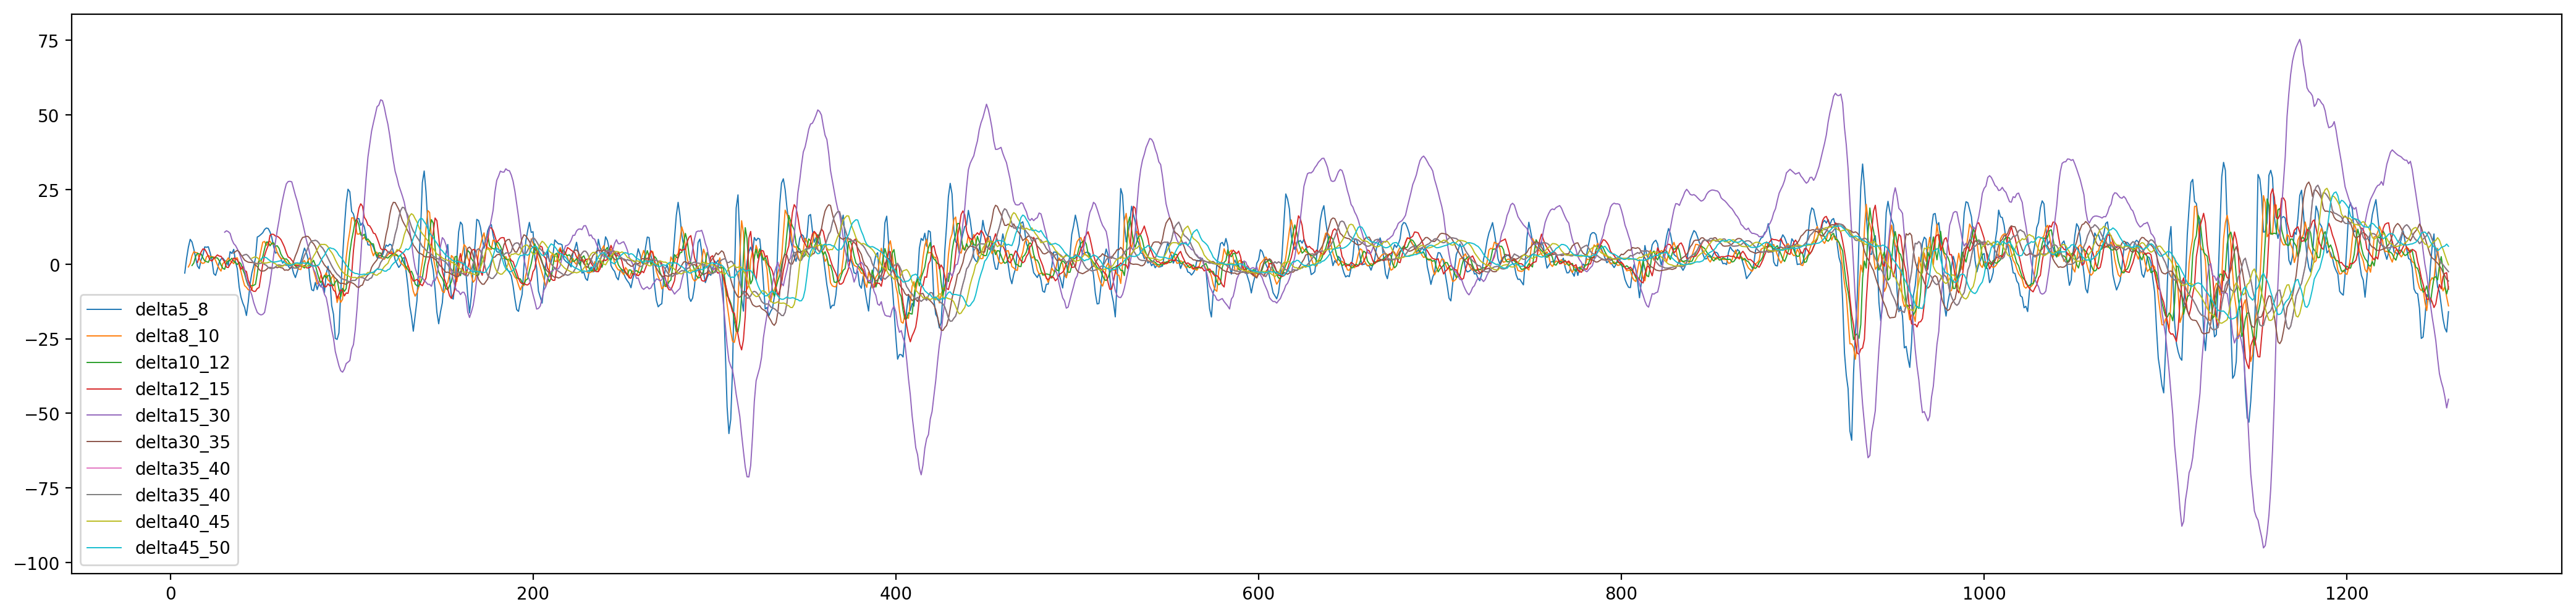

In [627]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [628]:
dataset_1D.tail()

Date     Open     High      Low    Close    Vix P/C Ratio  \
1252  20190529  2790.25  2792.03  2766.06  2783.02  14.75      1.03   
1253  20190530  2786.94  2799.00  2776.74  2788.86  16.92      1.45   
1254  20190531  2766.15  2768.98  2750.52  2752.06  15.85      0.99   
1255  20190603  2751.53  2763.07  2728.81  2744.45  17.50      1.33   
1256  20190604  2762.64  2804.49  2762.63  2803.40    NaN       NaN   

      Varop_Spy  Varhl_spy  Varop_vix  ...  delta10_12  delta12_15  \
1252       7.23      25.97       0.31  ...    2.499667   -8.308333   
1253      -1.92      22.26      -0.99  ...   -1.792833   -4.188500   
1254      14.09      18.46       0.49  ...   -7.356333   -3.140333   
1255       7.08      34.26      -0.95  ...   -9.988500   -2.886167   
1256     -40.76      41.86        NaN  ...   -7.594833   -8.398167   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50   Spread  \
1252  -39.352000   -1.463619    0.381786    6.245389    5.598511  2768.27   
1253  -41.449333   -2.851048   -0.211286    4.943667    5.814933  2771.94   
1254  -44.413667   -3.907381   -1.067786    3.094833    6.073667  2736.21   
1255  -48.191000   -5.149476   -1.804857    1.298889    6.704711  2726.95   
1256  -45.270000   -5.663429   -2.543071   -0.245722    5.962022      NaN   

      Peaks  Valley  
1252      0       0  
1253      0       0  
1254      0       0  
1255      0       0  
1256      1       0  

[5 rows x 27 columns]

In [629]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1256)

In [630]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(1256,)

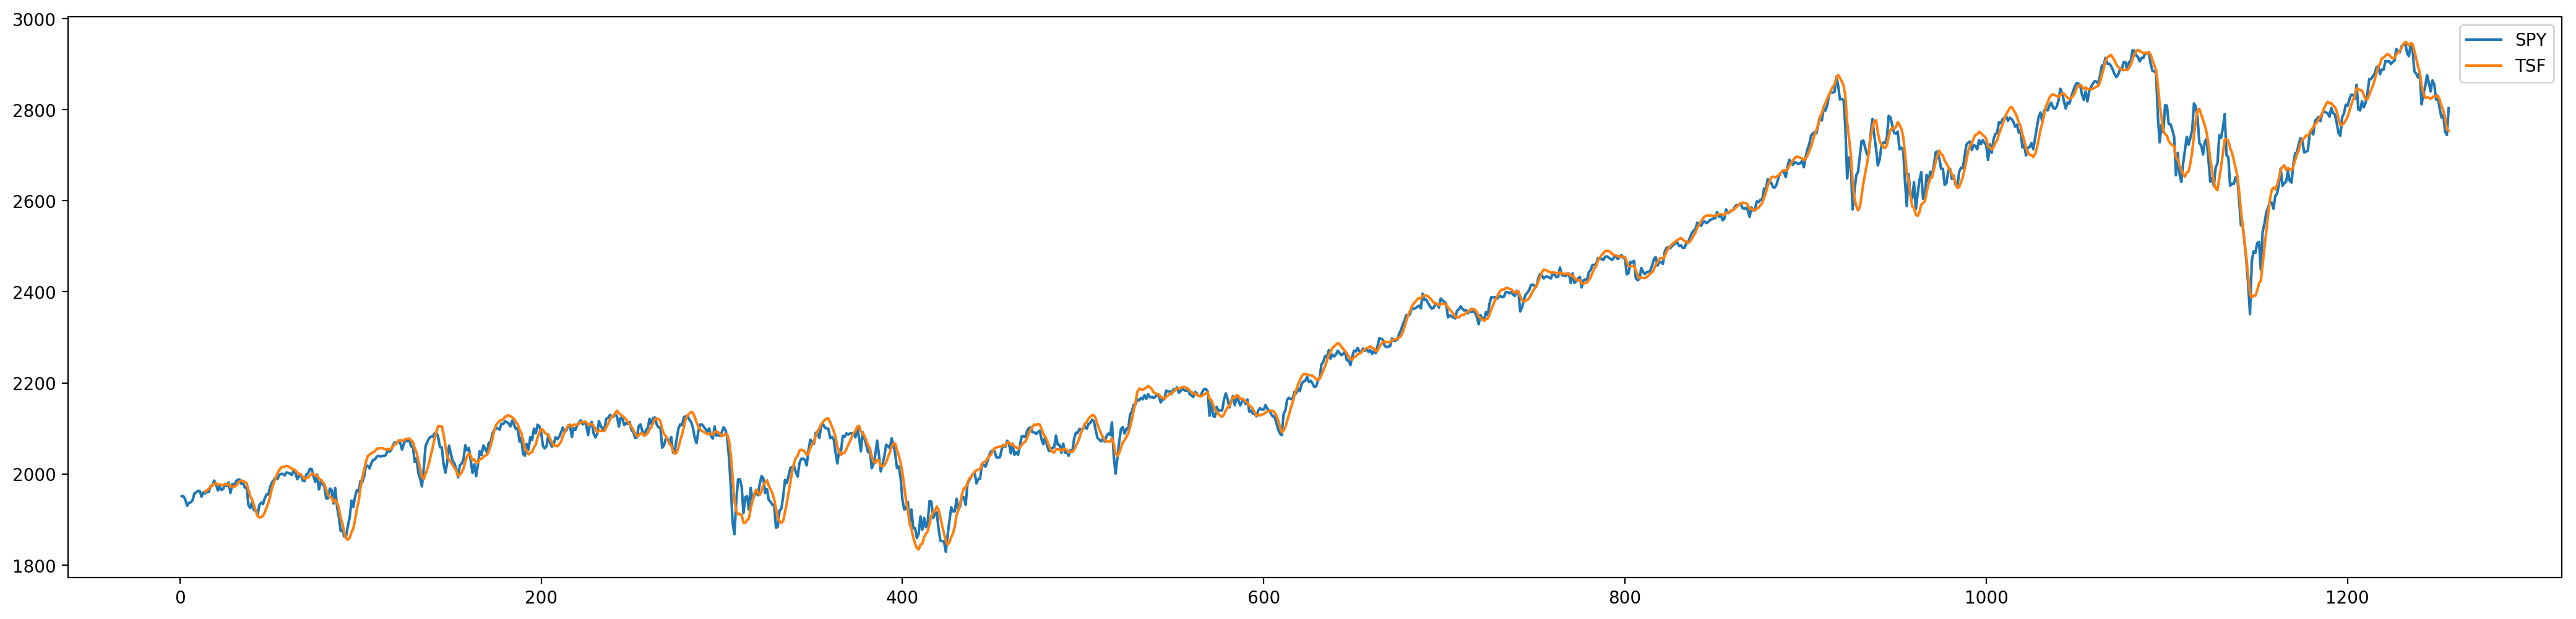

In [631]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [632]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(1256, list)

In [633]:
dataset_1D['Forcast Oscillator'] = (forosc)

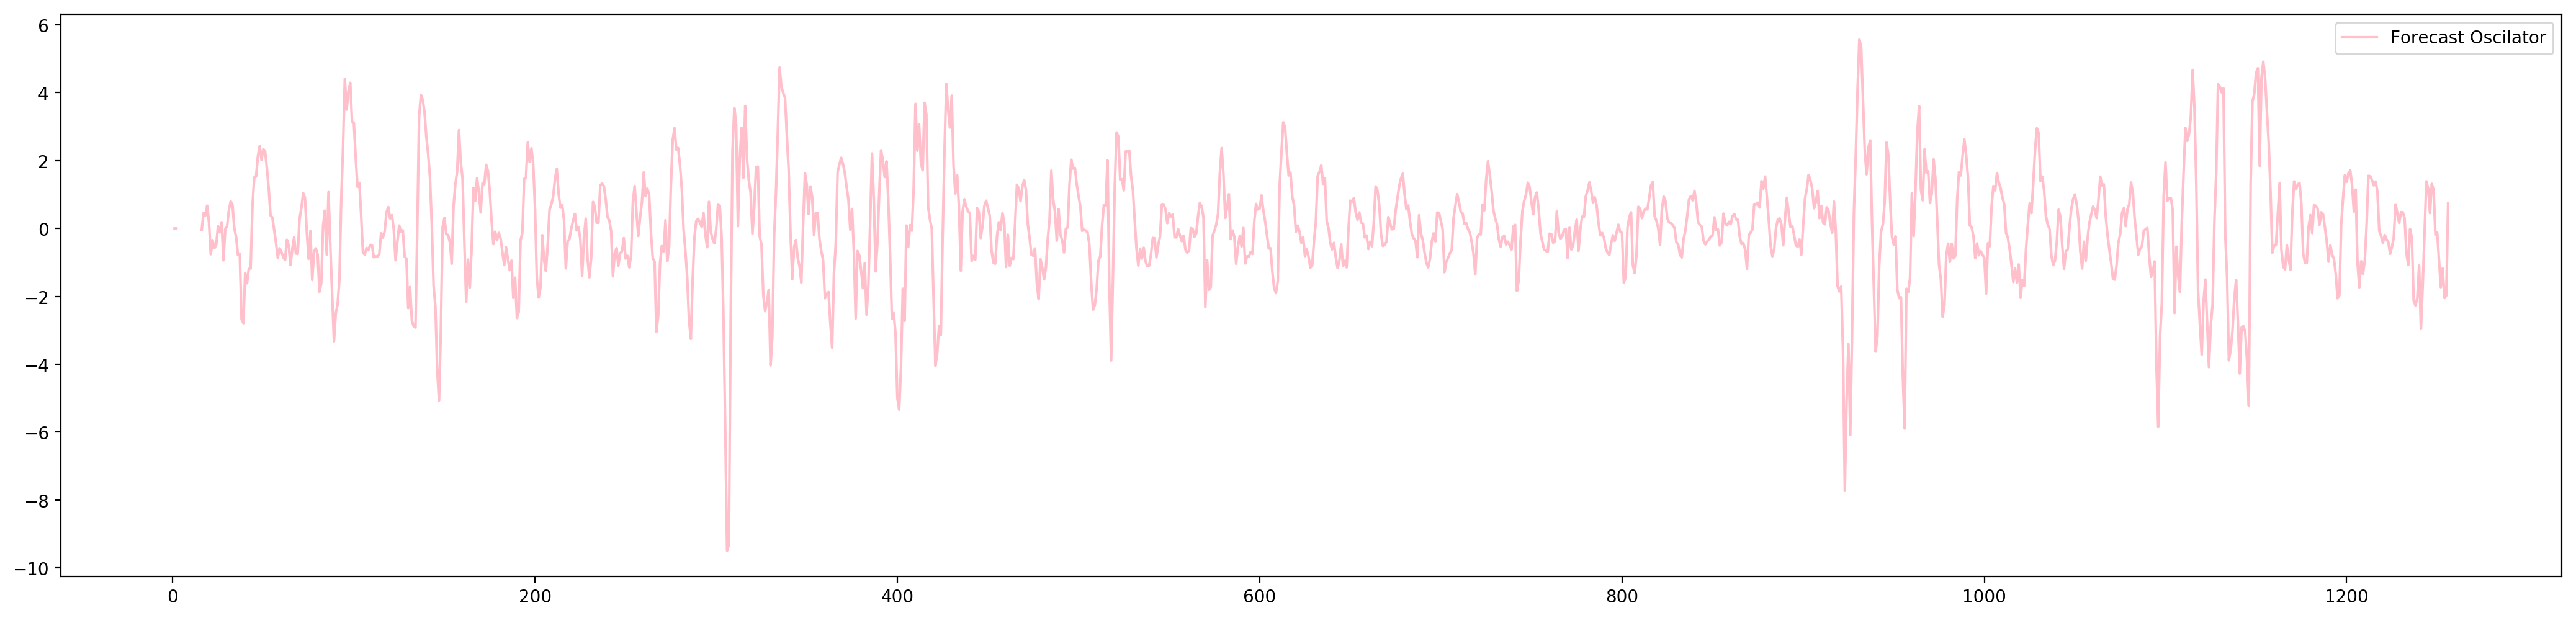

In [634]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

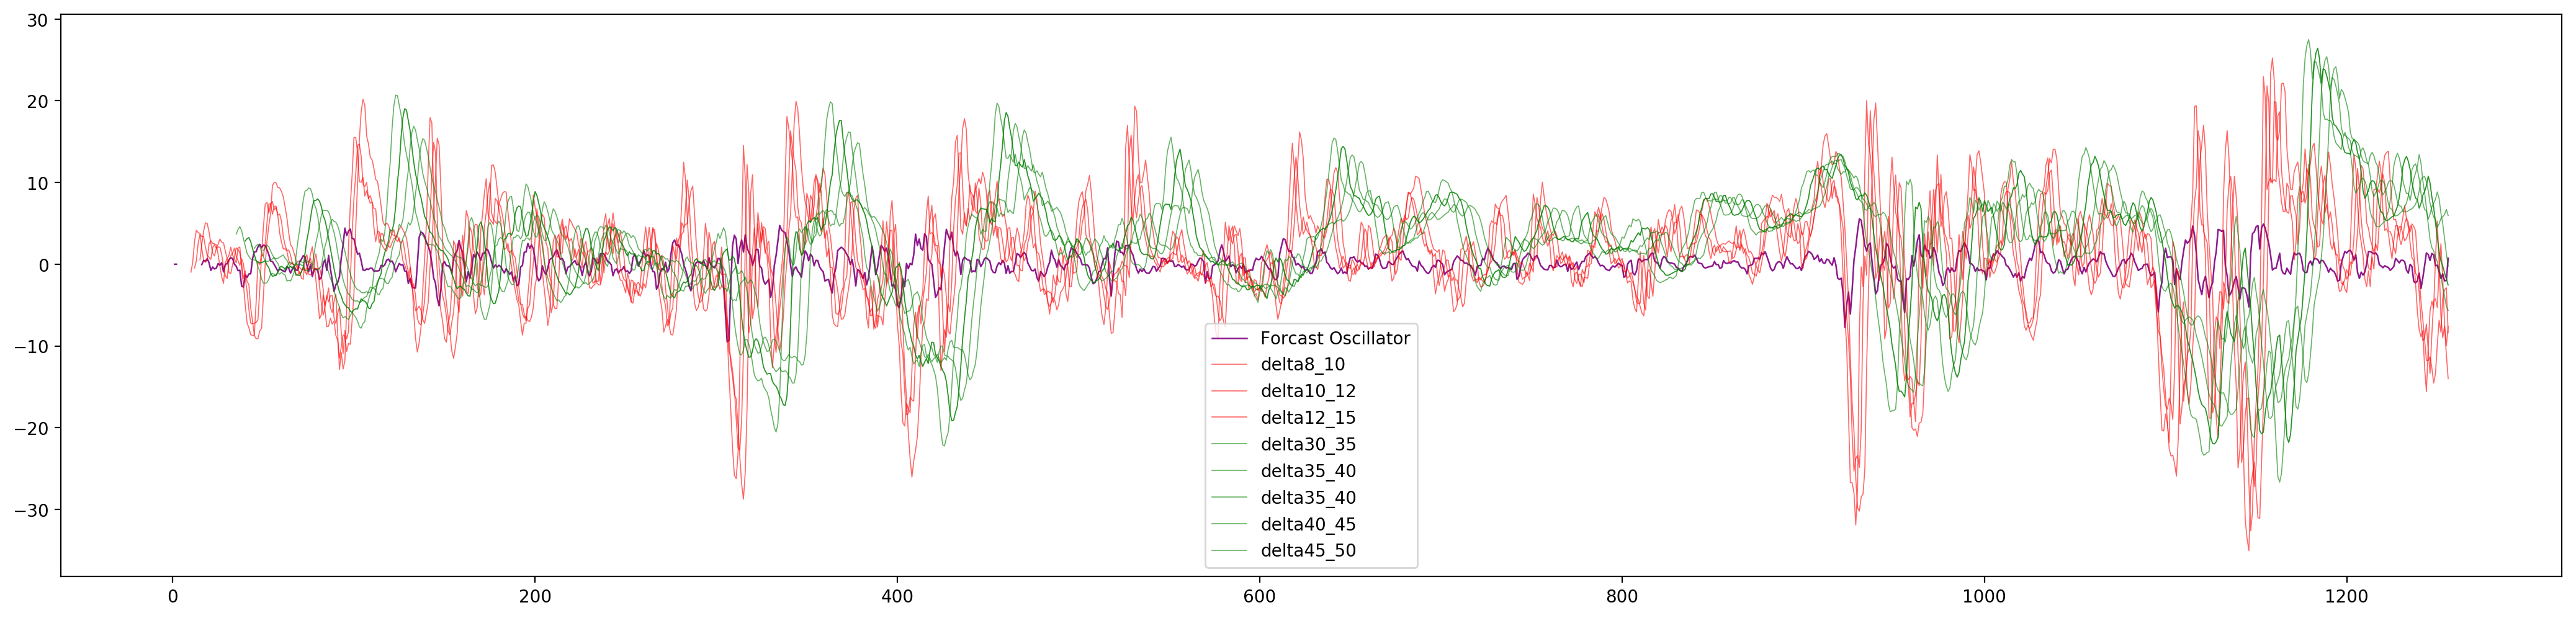

In [635]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [636]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 29 columns):
Date                  1256 non-null int64
Open                  1256 non-null float64
High                  1256 non-null float64
Low                   1256 non-null float64
Close                 1256 non-null float64
Vix                   1255 non-null float64
P/C Ratio             1255 non-null object
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
Varop_vix             1255 non-null float64
Varhl_vix             1255 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35      

In [637]:
dataset_1D.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Vix, P/C Ratio, Varop_Spy, Varhl_spy, Varop_vix, Varhl_vix, RSI, 75 - RSI, RSI - 25, BBD_Delta_Up, delta5_8, delta8_10, delta10_12, delta12_15, delta15_30, delta30_35, delta35_40, delta40_45, delta45_50, Spread, Peaks, Valley, delta_tsf, Forcast Oscillator]
Index: []

[0 rows x 29 columns]

In [638]:
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-1):
    
    if (dataset_1D.iloc[i+1,7] * dataset_1D.iloc[i,7]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > 0.01 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -0.01 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)
#target_up.append(0)
#target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [639]:
len(target_up),len(target_down)

(1256, 1256)

In [640]:
dataset_1D['target_up'] = valley #target_up
dataset_1D['target_down'] = peak #target_down

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(25, 26)

In [641]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [642]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 28 columns):
Date                  1256 non-null int64
Vix                   1255 non-null float64
P/C Ratio             1255 non-null object
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
Varop_vix             1255 non-null float64
Varhl_vix             1255 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
Spread          

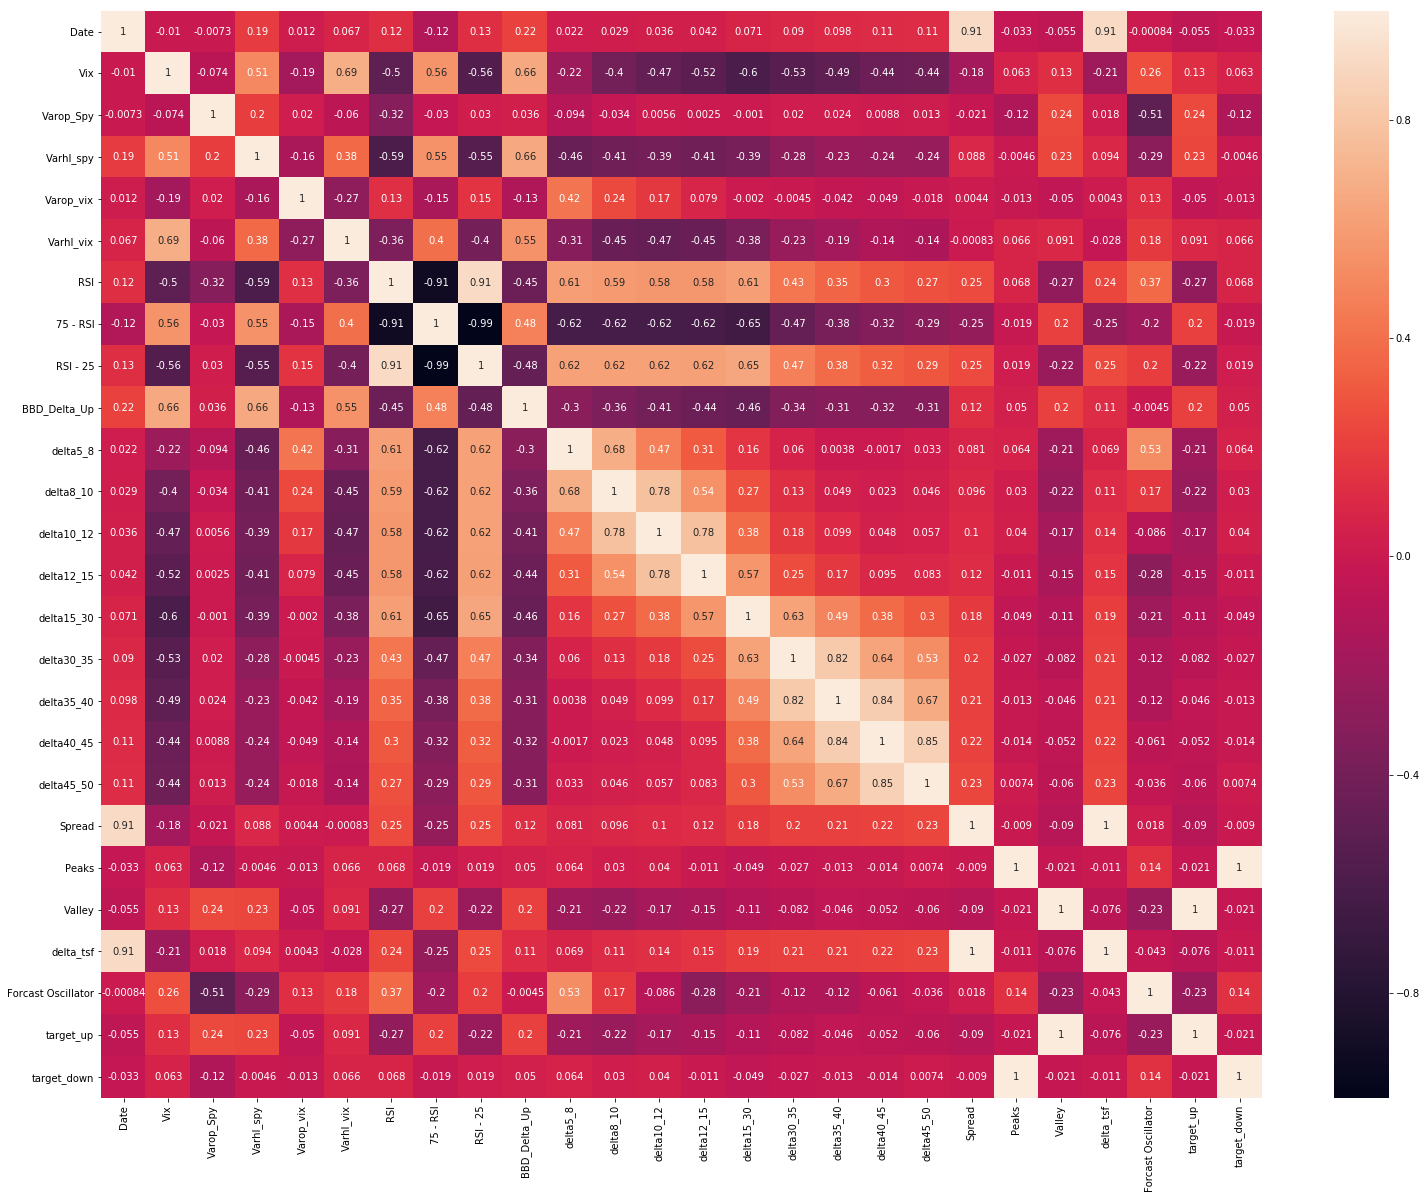

In [643]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [644]:
dataset_1D.tail()

Date    Vix P/C Ratio  Varop_Spy  Varhl_spy  Varop_vix  Varhl_vix  \
1252  20190529  14.75      1.03       7.23      25.97       0.31       1.02   
1253  20190530  16.92      1.45      -1.92      22.26      -0.99       2.77   
1254  20190531  15.85      0.99      14.09      18.46       0.49       1.00   
1255  20190603  17.50      1.33       7.08      34.26      -0.95       1.80   
1256  20190604    NaN       NaN     -40.76      41.86        NaN        NaN   

            RSI   75 - RSI   RSI - 25  ...  delta40_45  delta45_50   Spread  \
1252  34.298736  37.883125  12.116875  ...    6.245389    5.598511  2768.27   
1253  35.879460  40.701264   9.298736  ...    4.943667    5.814933  2771.94   
1254  30.843665  39.120540  10.879460  ...    3.094833    6.073667  2736.21   
1255  29.908813  44.156335   5.843665  ...    1.298889    6.704711  2726.95   
1256  44.054547  45.091187   4.908813  ...   -0.245722    5.962022      NaN   

      Peaks  Valley    delta_tsf  Forcast Oscillator  target_up  target_down  \
1252      0       0  2808.522967           -1.732109          0            0   
1253      0       0  2798.660769           -1.177617          0            0   
1254      0       0  2782.860769           -2.051662          0            0   
1255      0       0  2756.925385           -1.975287          0            0   
1256      1       0  2754.018571            0.732654          0            1   

      target_value  
1252       2783.02  
1253       2788.86  
1254       2752.06  
1255       2744.45  
1256       2803.40  

[5 rows x 28 columns]

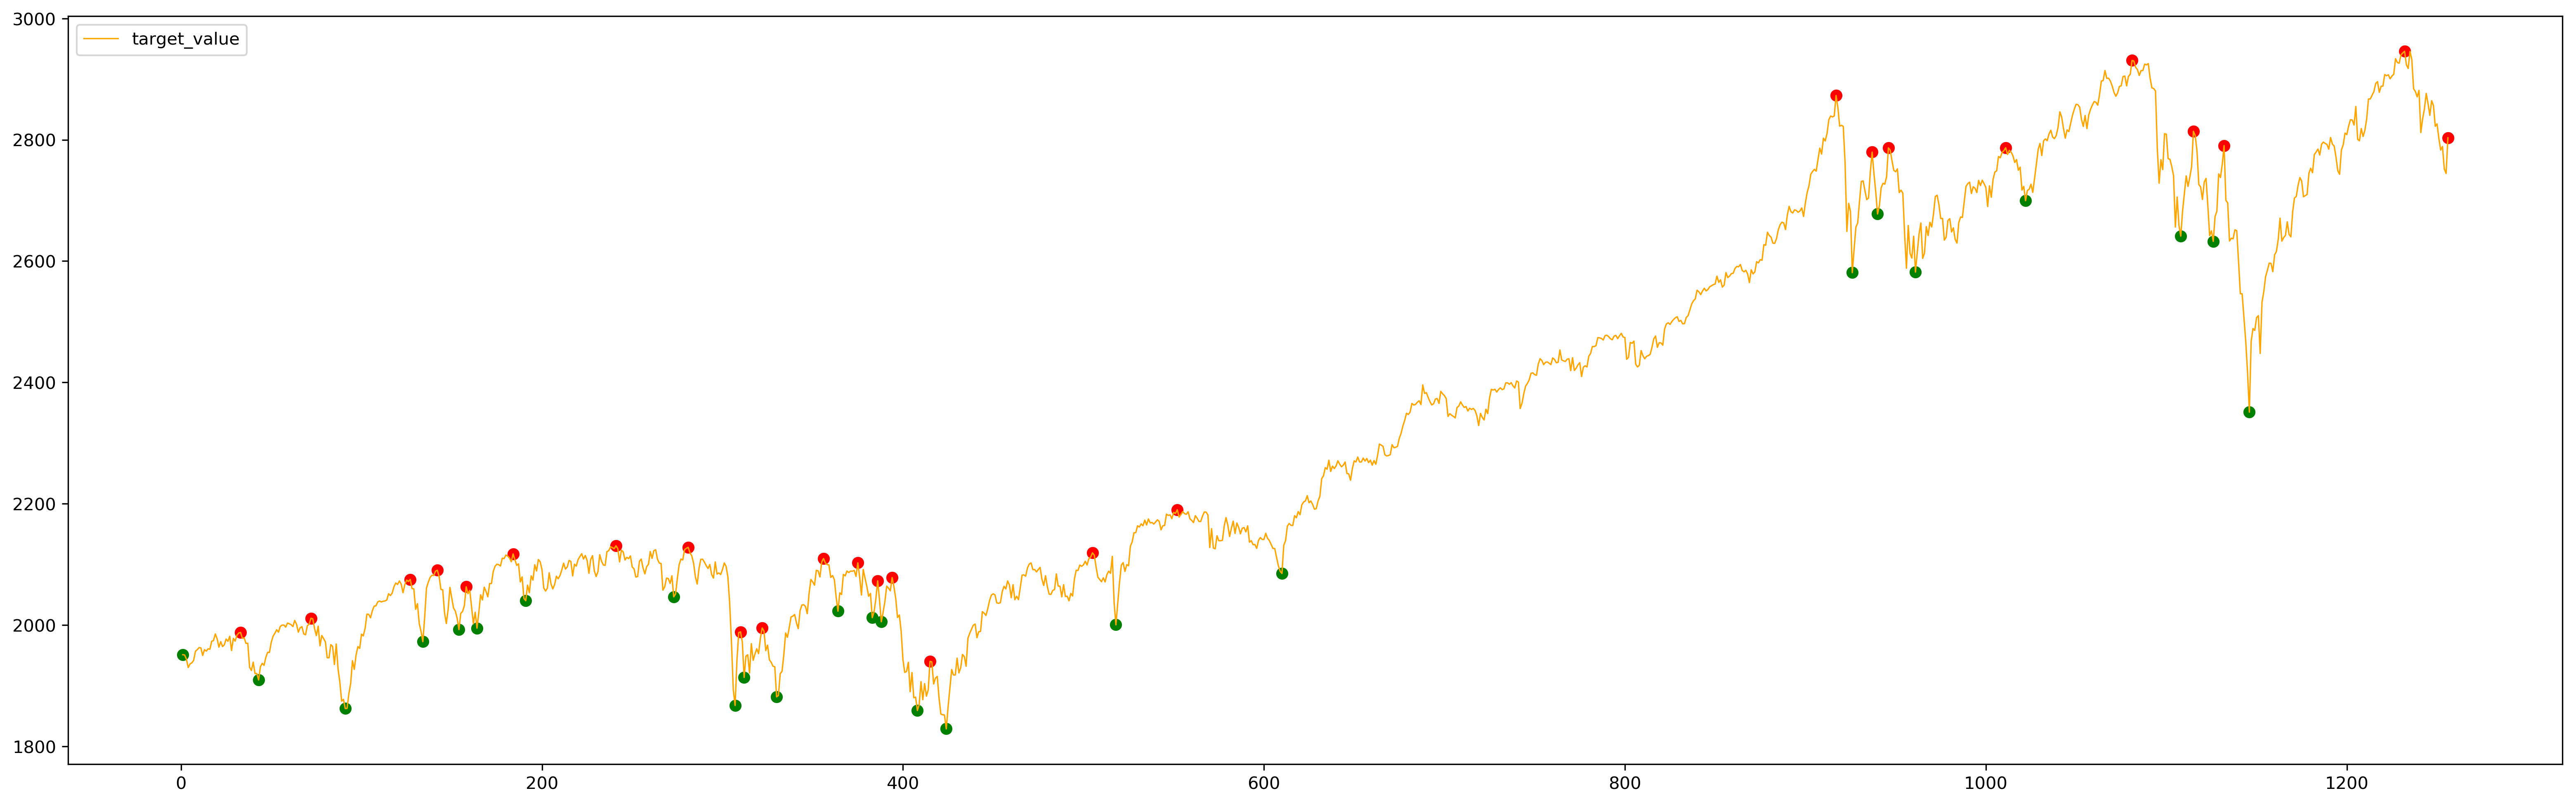

In [645]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [646]:
dataset_1D.to_csv('20190526 data prepared.csv')